# Financial Graveyard: Digging in to Failed Loans
## by Spencer McTavish

## Preliminary Wrangling

Prosper Loans provides a means for individuals to finance personal loans for others throughout the US. They have collected and shared a large dataset of loans for review. The dataset consists of a number of financial indicators and information gathered from those seeking loans for the purposes of assessing those loans.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

### Potential Questions
* What factors affect a loan’s outcome status?
* What affects the borrower’s APR or interest rate?
* Are there differences between loans depending on how large the original loan amount was?

In [2]:
#the csv was 
loans = pd.read_csv('data/prosperLoanData.csv')
loans_def=pd.read_csv('data/prosperLoanData-def.csv')

In [3]:
loans.shape

(113937, 81)

In [4]:
loans_def.shape

(81, 2)

In [5]:
loans.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
7416,5A35340770560166677C59E,247310,2007-12-08 18:41:01.430000000,E,36,Completed,2009-06-26 00:00:00,0.26914,0.2500,0.2400,...,-7.57,0.0,0.00,0.00,0.0,1.0,0,0,0.0,16
96525,D0B03569554851107B46DDA,704499,2013-01-24 11:49:24.637000000,NaN,36,Current,NaN,0.14857,0.1203,0.1103,...,-46.14,0.0,0.00,0.00,0.0,1.0,0,0,0.0,88
17074,002E3533831806038A9533E,542293,2011-12-01 20:29:12.550000000,NaN,36,Current,NaN,0.24246,0.2049,0.1949,...,-125.06,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
85149,CEBE36014073644878D21DB,1203846,2014-02-13 06:58:57.683000000,NaN,36,Current,NaN,0.06726,0.0605,0.0505,...,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
91491,FB7133652906462784283B1,1692,2006-03-10 11:09:49.623000000,E,36,Defaulted,2007-06-18 00:00:00,0.17036,0.1575,0.1400,...,-5.30,0.0,1099.82,1078.82,0.0,1.0,0,0,0.0,10
8727,645635293602276863EEED2,533954,2011-10-19 09:29:12.067000000,NaN,36,Completed,2012-04-11 00:00:00,0.35132,0.3149,0.3049,...,-24.05,0.0,0.00,0.00,0.0,1.0,0,0,0.0,11
85567,EAE93427743223399E67CC6,376275,2008-08-01 02:45:04.913000000,HR,36,Completed,2010-05-14 00:00:00,0.37453,0.3500,0.3400,...,-11.93,0.0,0.00,0.00,0.0,1.0,0,0,0.0,12
4588,106C337311136605796A8C3,54585,2006-10-29 10:15:38.283000000,B,36,Completed,2009-11-06 00:00:00,0.17722,0.1700,0.1550,...,-37.51,0.0,0.00,0.00,0.0,1.0,0,0,0.0,49
97517,EE5B3595530576406111044,1057094,2013-12-06 08:45:26.887000000,NaN,36,Current,NaN,0.16732,0.1314,0.1214,...,-25.19,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
27665,2C1C35458482274562BF067,587335,2012-05-09 09:42:12.290000000,NaN,36,Current,NaN,0.21372,0.1768,0.1668,...,-74.03,0.0,0.00,0.00,0.0,1.0,0,0,0.0,79


In [6]:
loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of your dataset?

The dataset is a large .csv consisting of each loan made by Prosper. It consists of a mass of individual data points for each loan. 

There exists a MemberKey column that is a unique identifier for each borrower in the dataset, which can be used for comparison purposes. 

### What is/are the main feature(s) of interest in your dataset?

I'm interested in answering the question: 
> "What factors affect a loan's outcome status?"

This measure is captured under `LoanStatus`.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Relevant data should be unique to each loan, and indicative of the type of loan. The definitions in `loans_def` were reviewed to determine areas of possible interest. Features of interest that were reviewed in the list below are **bolded**, and have been summarized in to categories: 


|Credit History                  |  Loan Info                 | Borrower Info                  |
|--------------------------------|----------------------------|--------------------------------|
|  **`CreditGrade`**             |  **`Term`**                |  **`Occupation`**              |
|  **`ProsperRating (Alpha)`**   |  **`BorrowerAPR`**         |  `EmploymentStatus`            |
|  `ProsperScore`                |  `BorrowerRate`            |  `EmploymentStatusDuration`    |
|  **`CreditScoreRangeLower`**   |  **`LenderYield`**         |  `IsBorrowerHomeowner`         |
|  **`CreditScoreRangeUpper`**   |  `EstimatedEffectiveYield` |  **`DebtToIncomeRatio`**       |
|  `CurrentCreditLines`          |  `EstimatedLoss`           |  **`IncomeRange`**             |
|  `ScorexChangeAtTimeOfListing` |  `EstimatedReturn`         |  **`IncomeVerifiable`**        |
|  `TotalCreditLinespast7years`  |  **`LoanOriginalAmount`**  |  **`StatedMonthlyIncome`**     |
|  `OpenCreditLines`             |  **`MonthlyLoanPayment`**  |  `MemberKey`                   |
|  `OpenRevolvingAccounts`       |  **`ListingCategory`**     |  **`Recommendations`**         |
|  `InquiriesLast6Months`        | **`LoanStatus`**           |  **`InvestmentFromFriendsCount`**  |
|  `TotalInquiries`              |    &nbsp;                  |  `InvestmentFromFriendsAmount` |
|  `CurrentDelinquencies`        |      &nbsp;                |  `Investors`                   |
|  `AmountDelinquent`            |          &nbsp;             |                                |
|  `DelinquenciesLast7Years`     |          &nbsp;            |                                |
|  `PublicRecordsLast10Years`    |            &nbsp;          |                                |
|  `PublicRecordsLast12Months`   |            &nbsp;          |                                |
|  `RevolvingCreditBalance`      |            &nbsp;          |                                |
|  `BankcardUtilization`         |              &nbsp;        |                                |
|  `AvailableBankcardCredit`     |              &nbsp;        |                                |
|  `TotalTrades`                 |               &nbsp;       |                                |
|  `TradesNeverDelinquent`       |               &nbsp;       |                                |
|  `TradesOpenedLast6Months`     |               &nbsp;       |                                |






We're going to limit this exploration to a smaller range of variables for the sake of my own sanity, and based on my current understanding of the workings of a loan. My hypothesis is that these overall concepts will lead to debt failure: 
* Over leveraging. Current debt ratios will affect an individual's ability to pay the loan back. 
* Past failure. Poor credit scores and past failures are a risk factor in a new loan failing. 
* Aggressive loans. High-rate loans are likely to cause difficulties for someone trying to pay them back.
* Social support. A presence of a social network should suggest a healthy financial backing and an ability to pay back the loan.

## Univariate Exploration

Let's look in to our loan statuses to see what outcome data we have access to.

In [7]:
loans.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

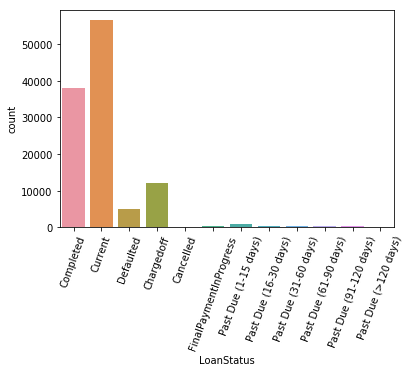

In [8]:
status_order = ['Completed', 'Current','Defaulted','Chargedoff','Cancelled',
         'FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)',
         'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)', 
         'Past Due (>120 days)']
sb.countplot(data=loans,x='LoanStatus',order=status_order)
plt.xticks(rotation=70)

In [9]:
# are Canceleld loans worth keeping around?  
(loans['LoanStatus']=='Cancelled').sum()
#can't hurt?

5

The datapoints we'll be using to measure a loan's success are `Completed`, `Defaulted`, `Chargedoff`,`Cancelled`, and `FinalPaymentInProgress`. Including `Current` loans as a success measure could be defended, but won't be done for this analysis. Let's reduce our dataset to these items for further review. 

In [10]:
#grab completed loans only for review
loans_c = loans[loans['LoanStatus'].isin(['Completed','Defaulted','Chargedoff','Cancelled','FinalPaymentInProgress'])]
loans_c.LoanStatus.unique()

array(['Completed', 'Defaulted', 'Chargedoff', 'Cancelled',
       'FinalPaymentInProgress'], dtype=object)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

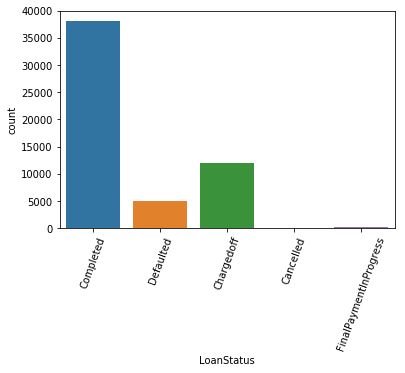

In [11]:
sb.countplot(data=loans_c,x='LoanStatus')
plt.xticks(rotation=70)

In [12]:
#let's look at loan failure and success rates
loan_failure = ['Defaulted','Chargedoff','Cancelled']
loan_success=['Completed','FinalPaymentInProgress']
loans_c['LoanStatus'].isin(loan_failure).sum()/loans_c.shape[0] , loans_c['LoanStatus'].isin(loan_success).sum()/loans_c.shape[0]

(0.307718739827106, 0.6922812601728939)

While most of our loans are successful, there is still a large portion of failed loans in this dataset. A 30.8% failure to pay back a loan seems like a risky investment! 

### Credit Grade Inspection
Let's review the variation in credit grades for our Prosper Loans. We'll need to  tidy up this data first - there are two Credit Grade scores, a pre-2009 `CreditGrade` and a post 2009 `ProsperRating (Alpha)`.

In [13]:
#type check
loans_c[['CreditGrade','ProsperRating (Alpha)']].dtypes

CreditGrade              object
ProsperRating (Alpha)    object
dtype: object

In [14]:
#values check Thanks to:https://stackoverflow.com/questions/26977076/pandas-unique-values-multiple-columns 
#np.unique()
loans_c['CreditGrade'].unique()

array(['C', 'HR', nan, 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [15]:
loans_c['ProsperRating (Alpha)'].unique()

array([nan, 'HR', 'D', 'E', 'A', 'AA', 'B', 'C'], dtype=object)

The two rating mechanisms appear to be functionally identical and are mutually exclusive in terms of included data. However, I want to review our loan data holistically, and need to combine these two items. The assumption is that these are going to be identical measures, but this hasn't been verified against Credit Score or any other factors currently.

(I recognize this is a bit sloppy, it's on a to-do if this dataset gets revisited)

In [16]:
#CreditGrade is easier to write, so we'll maintain the ratings there. Any NA values found there will be filled by
#Prosper Rating values. Assume these are equivalent for now - we can go check this assumption by 

loans_c['CreditGrade'].fillna(loans_c['ProsperRating (Alpha)'],inplace = True)

C:\Users\Maliarenko\Anaconda3\envs\pretty\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
#check any NaN items
loans_c['CreditGrade'].isna().sum()

131

In [18]:
#see what NaN items are - just bad data? Do we have credit data?
loans_c[loans_c['CreditGrade'].isna()][['CreditScoreRangeLower','CreditScoreRangeUpper']].isna().sum()

CreditScoreRangeLower    0
CreditScoreRangeUpper    0
dtype: int64

In [19]:
#we have credit data - it shoudl be possible to go fix this by figuring out what the credit scores are and binning them
#but will leave this as an exercise for later. Let's mark them as none for now and see how big a problem this is
loans_c['CreditGrade'].fillna('none',inplace=True)

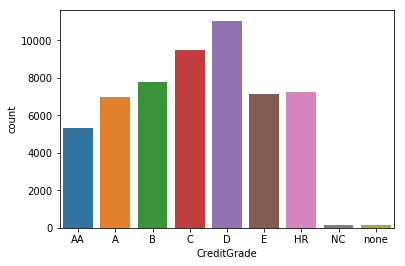

In [20]:
credit_order = ['AA','A','B','C','D','E','HR','NC','none']
sb.countplot(x = loans_c['CreditGrade'],order=credit_order)

It's interesting to see that a D credit grade is the most common value, and that E and HR credit grades are equally represented and with a sharp drop-off after D credit grade. Our population is somewhat skewed as a result. Fortunately, data where we're missing credit grades is fairly low. We'll leave these rows in the dataframe for now in case another variable will expose something interesting. 

### Credit Scores

Given the assumption that past credit predictors are expected to be a good indicator of success, let's see where these values range. 

In [21]:
loans_c['CreditScoreRangeLower'].describe()

count    54703.000000
mean       671.847979
std         81.823962
min          0.000000
25%        640.000000
50%        680.000000
75%        720.000000
max        880.000000
Name: CreditScoreRangeLower, dtype: float64

In [22]:
loans_c['CreditScoreRangeUpper'].describe()

count    54703.000000
mean       690.847979
std         81.823962
min         19.000000
25%        659.000000
50%        699.000000
75%        739.000000
max        899.000000
Name: CreditScoreRangeUpper, dtype: float64

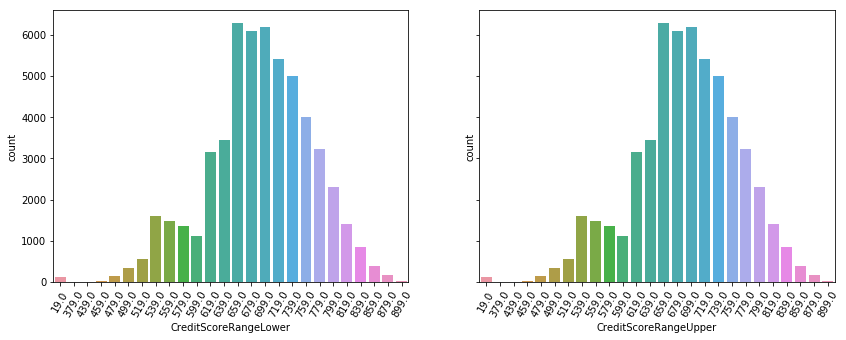

In [23]:
fig,ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(14,5))

sb.countplot(data=loans_c, x = 'CreditScoreRangeLower',ax=ax[0])
sb.countplot(data=loans_c, x = 'CreditScoreRangeUpper',ax=ax[1])
for ax in ax:
    plt.sca(ax)
    plt.xticks(rotation=60)

These values look pretty similar. Is there any real difference here? 

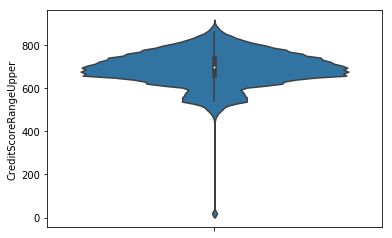

In [24]:
sb.violinplot(data=loans_c,y='CreditScoreRangeUpper')

The credit score ranges suggest the same distribution in `CreditGrade`, with a large number of middle of the road scores followed by a snigificant drop-off afterwards. 

It appears that we have some outlier data as well, with the rows in the 19.0 bin. 


In [25]:
# Let's look at credit score variance to see if there's any meaningful differnces to review
loans_c['CreditScoreVar'] = loans_c['CreditScoreRangeUpper'] - loans_c['CreditScoreRangeLower']
loans_c['CreditScoreVar'].describe()

C:\Users\Maliarenko\Anaconda3\envs\pretty\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    54703.0
mean        19.0
std          0.0
min         19.0
25%         19.0
50%         19.0
75%         19.0
max         19.0
Name: CreditScoreVar, dtype: float64

Well, that doesn't show anything useful. Let's ignore that. We'll just use `CreditScoreRangeUpper` going forward.

In [26]:
loans_c.drop(axis = 'columns', labels = ['CreditScoreVar','CreditScoreRangeLower'],inplace=True)

C:\Users\Maliarenko\Anaconda3\envs\pretty\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Loan Information  

Let's look in to what sort of ranges on loan terms we have. How long do the loans last, how do they vary in amount, monthly payment, and APR?

What kinds of loans are we dealing with?

In [27]:
loans_c['BorrowerAPR'].describe()

count    55269.000000
mean         0.222220
std          0.088163
min          0.006530
25%          0.149740
50%          0.214340
75%          0.295100
max          0.512290
Name: BorrowerAPR, dtype: float64

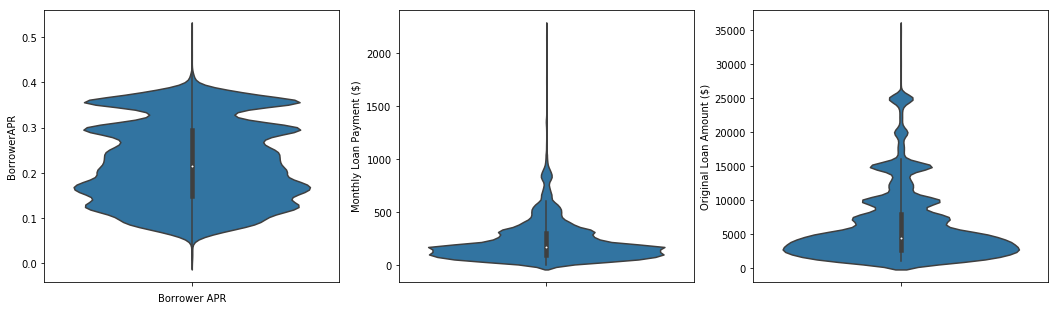

In [28]:
fig,ax = plt.subplots(1,3,figsize=(18,5))

sb.violinplot(data=loans_c, y = 'BorrowerAPR',ax=ax[0])
ax[0].set_xlabel('Borrower APR')
sb.violinplot(y=loans_c['MonthlyLoanPayment'],ax=ax[1])
ax[1].set_ylabel('Monthly Loan Payment ($)')
sb.violinplot(y=loans_c['LoanOriginalAmount'],ax=ax[2]);
ax[2].set_ylabel('Original Loan Amount ($)');

In [29]:
loans_c['MonthlyLoanPayment'].describe()

count    55294.000000
mean       223.992288
std        186.097437
min          0.000000
25%         98.570000
50%        172.600000
75%        300.785000
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

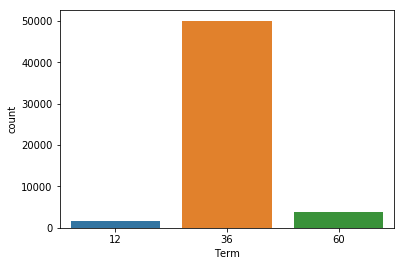

In [30]:
sb.countplot(x=loans_c['Term'])

We can see that there's some obvious clustering in terms of `BorrowerAPR`, `MonthlyLoanPayment` and `OriginaLoanAmounts`. It's not clear if there's any obvious relationships to the failure rate of a loan, which we'll have to explore using more variables in our exploration. 

The vast majority of our loan `Term`s are in the 3 year period. This suggests that loan term isn't going to have a significant effect on the loan's success.

Let's take a peek at listing categories next to see if there seems to be an interesting spread of data there.

In [31]:
#Listing Categorys are currently numeric. Let's make them easier to read and plot

#based on description from Loan Data Definitions, make a replacement dictionary
listing_categories = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 
                      5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure',
                      11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental',
                      16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}

loans_c['ListingCategory (numeric)'].replace(listing_categories,inplace=True)
loans_c.rename(columns = {'ListingCategory (numeric)':'ListingCategory'},inplace=True)


C:\Users\Maliarenko\Anaconda3\envs\pretty\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Maliarenko\Anaconda3\envs\pretty\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


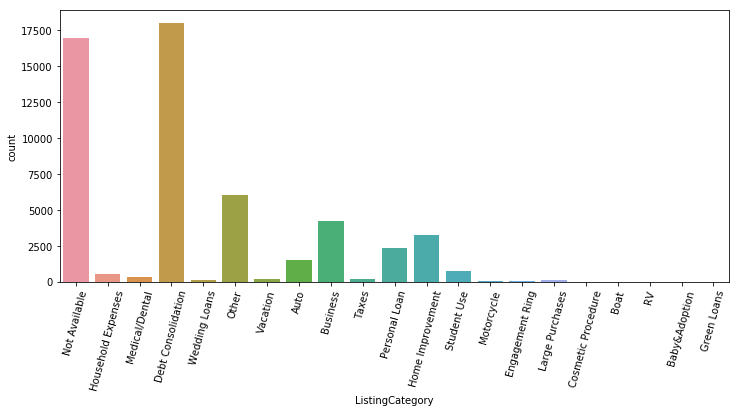

In [32]:
plt.subplots(figsize=(12,5))
sb.countplot(data=loans_c, x = 'ListingCategory');
plt.xticks(rotation=75);

We see some obvious peaks in loan distribution. Most of the loans appear to be Debt Consolidation loans. There may be some useful data here to figure out why loans fail, based on the type of loan that they are. However, with a large proportion of the data being effectively missing and with no way to retrieve it, this will have to be a secondary item.

### Borrower Information

I want to assess a few items here to see if there's areas worth further exploration. I'm particularly interested in income and debt ratios to see if there's any interesting variation which would suggest that multivariate analysis is worthwhile in those cases. 

My current hypothesis is that low debt to income ratios, high incomes and verifiable incomes make for less risky loans.

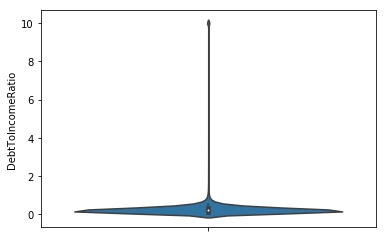

In [33]:
sb.violinplot(data=loans_c, y = 'DebtToIncomeRatio');

In [34]:
loans_c['DebtToIncomeRatio'].describe()

count    51048.000000
mean         0.289622
std          0.735379
min          0.000000
25%          0.130000
50%          0.200000
75%          0.300000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

Well, the violin plot shows very little variation in ratios, beyond some intense outliers. It was noted that the description for this variable includes the caveat: 'This value is capped at 10.01'. Given the small cluster of ratios in that area, it suggests that there's a wide range of high debt to income ratios gathered by that data-point. 

The lack of variation in the ratios on the lower end of the scale are interesting, and suggest that this may be a poor indicator of loan success or failure.

In [35]:
loans_c['IncomeRange'].unique()

array(['$25,000-49,999', 'Not displayed', '$1-24,999', '$50,000-74,999',
       '$75,000-99,999', '$100,000+', 'Not employed', '$0'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

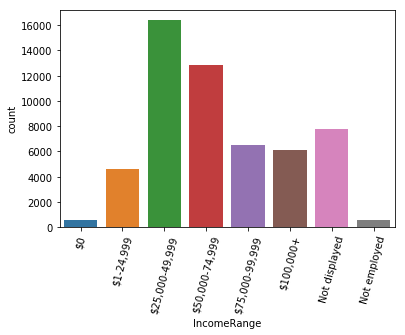

In [36]:
income_order = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed','Not employed']
sb.countplot(data=loans_c, x = 'IncomeRange',order=income_order);
plt.xticks(rotation=75)

There's variation in `IncomeRange`. This relationship is somewhat similar in nature to the Credit Grade ratings we were reviewing earlier. It's not likely that this is a causal relationship, but it's worth reviewing in terms of loan failure rates.

Unfortunately, there is also a large chunk of missing data which we won't have a way to fill.

In [37]:
loans_c['IncomeVerifiable'].describe()

count     55294
unique        2
top        True
freq      50977
Name: IncomeVerifiable, dtype: object

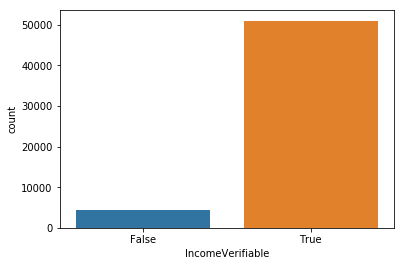

In [38]:
sb.countplot(data=loans_c, x = 'IncomeVerifiable',);


In [39]:
loans_c['StatedMonthlyIncome'].describe()

count     55294.000000
mean       5059.162183
std        5706.202157
min           0.000000
25%        2816.666667
50%        4166.666667
75%        6250.000000
max      618547.833333
Name: StatedMonthlyIncome, dtype: float64

In [40]:
loans_c['StatedMonthlyIncome'].isna().sum()

0

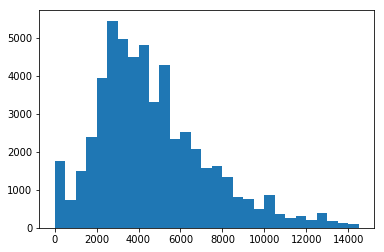

In [41]:
plt.hist(x = loans_c['StatedMonthlyIncome'], bins = range(0,15000,500));

The data shows that most of the loans have verifiable income - which is to be expected. The range of monthly incomes also shows significant skew, but most of our data appears to be in the $4000/mo range. 

While this is an expected result, it suggests that there may be a link between this data and loan outcomes.

The final piece of information I'm going to review is the social aspect of these loans. There are items in the dataset relating to friends investing in a loan. 

I suspect there may be an interesting relationship between friend investment and loan outcome, but I want to see if there's any meaningful variation in that data first.

In [42]:
loans_c['Recommendations'].describe()

count    55294.000000
mean         0.089087
std          0.452971
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         39.000000
Name: Recommendations, dtype: float64

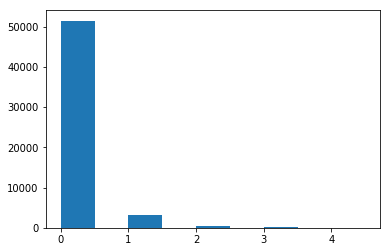

In [43]:
plt.hist(loans_c['Recommendations'],bins=np.arange(0,5,0.5));

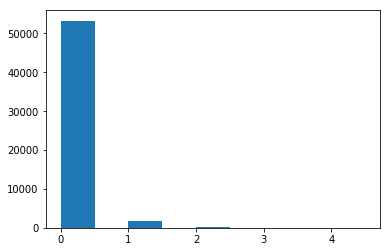

In [44]:
plt.hist(loans_c['InvestmentFromFriendsCount'],bins=np.arange(0,5,0.5));

In [45]:
loans_c['InvestmentFromFriendsAmount'].describe()

count    55294.000000
mean        33.470964
std        421.395202
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      25000.000000
Name: InvestmentFromFriendsAmount, dtype: float64

(0, 2000)

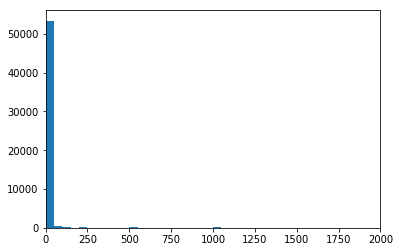

In [46]:
plt.hist(x= loans_c['InvestmentFromFriendsAmount'],bins = range(0,5000,50));
plt.xlim(0,2000)

Unfortunately, there's very little data relating to friendly or social loan investments. The vast majority of our loans have very little investment from friends, or even recommendations from their networks. The lack of data here suggests that there won't be a widespread enough effect to research further. This is not to say that there's no effect - we can determine this further if we look in to failure rates for these loans. However, again due to small sample size, we'll leave this be for now.

As a curiosity, what sort of occupations are represented in our data?

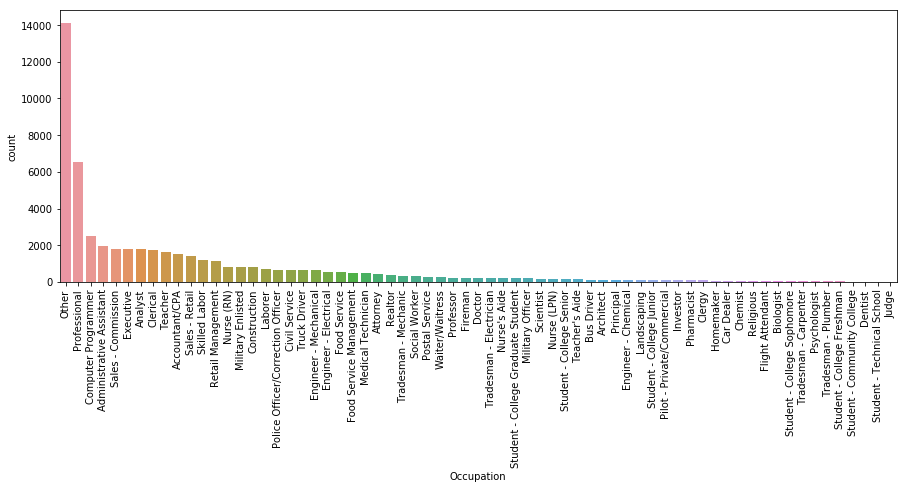

In [47]:
plt.subplots(figsize=(15,5))
sb.countplot(x=loans_c['Occupation'],order=loans_c['Occupation'].value_counts().index);
plt.xticks(rotation=90);

There appears to be a decent spread of values for `Occupation`, beyond that reported as 'Other'. There may be some interesting relationships that can be drawn here in terms of loan risk, but this will be a low priority item for now.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

It appears that there is some significant variation in borrowing terms, credit grades and scores, and in income ranges. All of these suggest that there's some sort of variation in that data, which suggests that it's wortwhile reviewing these items against `LoanStatus` to determine if there are any major indicators of a loans success. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were no particularly abnormal distributions, other than those shown in Credit Score. 

I've completed some mild tidying to get rid of all of our 'Current' loan data. When interested in outcomes, it doesn't make much sense to include loans that are either currently being paid or in arrears. These have been dropped from the dataset for further review.

I've also prepared a way to bin our failed loans together. Loans can fail and be recoreded either as 'Defaulted' or 'Charged Off'. I'm assuming here that Defaulted loans and Charged Off loans are equivalent for the purpsoes of analysis. There may be a case made for a Defaulted loan to be paid off or recovered in some way, but I can't think of a way to defend that as a successful loan. 


## Bivariate Exploration

### Credit Grade
Let's see how our Credit Grade affects our completion status.

In [48]:
#assume LoanStatus in FinalPaymentInProgress is the same as complete, to make our math easier
loans_c['LoanStatus'].replace(to_replace = 'FinalPaymentInProgress', value='Completed',inplace=True)

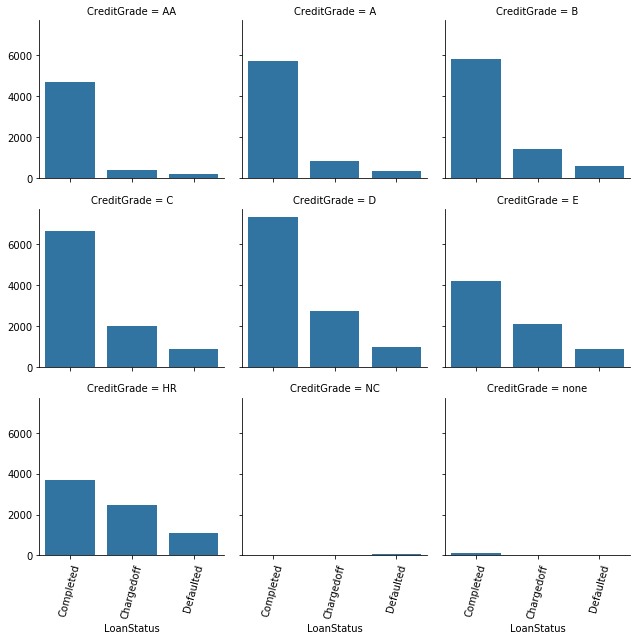

In [49]:
g = sb.FacetGrid(data=loans_c, col = 'CreditGrade',col_wrap=3,col_order=credit_order)
plt.xticks(rotation=75)
g.map(sb.countplot,"LoanStatus",order=['Completed','Chargedoff','Defaulted']);
g.set_xticklabels(rotation=75)

While interesting, and there is obvioulsy a trend to the number of completed loans vs failed loans between each Credit Grade, it would be better if we can see an actual rate and plot that. We'll review this in the multivariate analysis.

This sort of distribution is what I would expect, based on the purported efficacy of Credit Scores and Credit Grades.

### Loan Information Relationships
Is there anything interesting going on with `BorrowerAPR` and `MonthlyLoanPayment`?

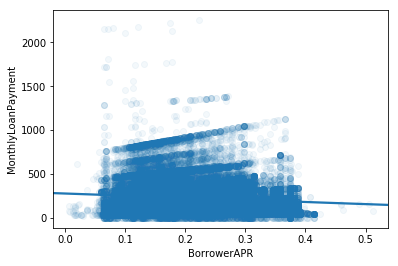

In [50]:
sb.regplot(data=loans_c,x='BorrowerAPR',y='MonthlyLoanPayment',scatter_kws={'alpha':0.05});

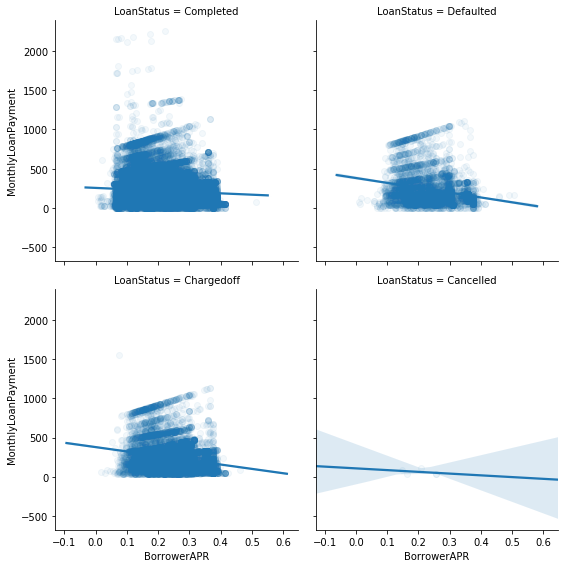

In [51]:
g= sb.FacetGrid(data = loans_c, col = 'LoanStatus',sharex=True,height=4,aspect=1,col_wrap=2)
g.map(sb.regplot,'BorrowerAPR','MonthlyLoanPayment',scatter_kws={'alpha':0.05});

There doesn't appear to be any significant difference in trend between `BorrowerAPR` and `MonthlyLoanPayments`, which is surprising. I would have expected to see some form of difference between the two. However, there's definitely some overplotting that needs to be contended with.

With the regression line drawn, we can see that there's some difference in the relationship between `BorrowerAPR` and `MonthlyLoanPayments` for each of the `LoanStatus` groups. It appears that a higher APR and lower monthly payments are realated to whether a loan will success or fail.

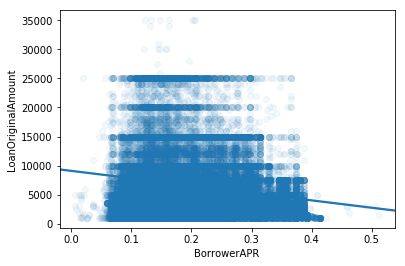

In [52]:
sb.regplot(data=loans_c,x='BorrowerAPR',y='LoanOriginalAmount',scatter_kws={'alpha':0.05});

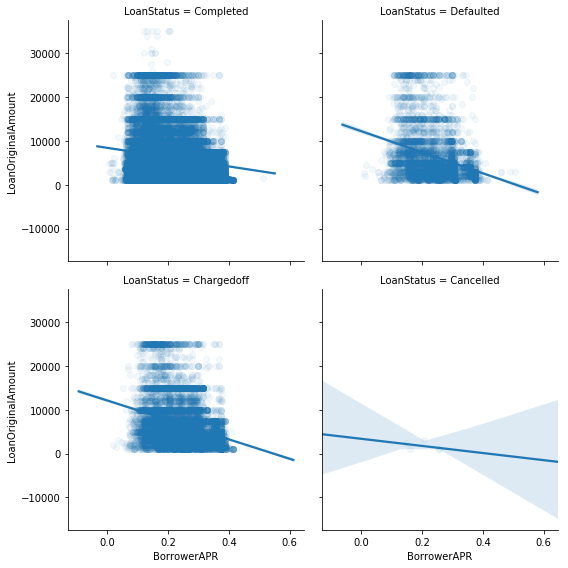

In [53]:
g= sb.FacetGrid(data = loans_c, col = 'LoanStatus',sharex=True,height=4,aspect=1,col_wrap=2)
g.map(sb.regplot,'BorrowerAPR','LoanOriginalAmount',scatter_kws={'alpha':0.05});

A comparison between `LoanOriginalAmount` and `BorrowerAPR` shows a negative relationship - higher Borrower APR's correspond with smaller loan amounts. This may be related to the borrowing power supplied by past credit history, which is worth checking in to further. 

It's interesting to note that there appears to be similar distributions across each of the `LoanStatus` types, with a noticeable negative trend between Completed and Failed loans. This may suggest that higher APR loans are more likely to fail.

That being said, there's not a strong trend to be seen here - APR and loan amounts vary significantly. 

In [54]:
loans_c['LoanStatus'] = loans_c['LoanStatus'].astype('category')

C:\Users\Maliarenko\Anaconda3\envs\pretty\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


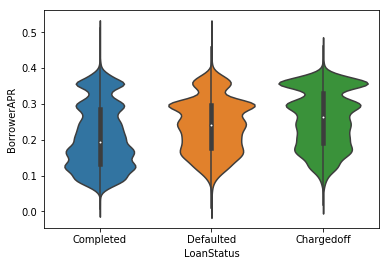

In [55]:
sb.violinplot(data=loans_c, x='LoanStatus' ,y = 'BorrowerAPR', order =['Completed','Defaulted','Chargedoff']);

The violin plots again show that completed loans are more likely to have lower `BorrowerAPR` values. This suggests there's a relationship worth looking in to regarding APR and `CreditGrade` again. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are some definite relationships between `BorrowerAPR` and `CreditGrade` that should be explored further. It would make sense that a low Credit Grade represents more risk, which would be associated with a higher rate to cover that risk. It would be interesting to see if there's a higher failure rate associated with higher ARP's on a loan. 

Another point of interest is the apparent relationship between larger `LoanOriginalAmount`s and `BorrowerAPR`. Larger loans tend to have lower APR's, or better terms. This seems somewhat counter-intuitve. Is this a force of the market? Do less risky people get or ask for larger loans? Are there costs associated with a loan that drive the up-front cost, and make smaller loans more expensive per unit?

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I don't think so!

## Multivariate Exploration

 > Note to the reviewer: This section is not strictly multivariate in nature. I ended up adding various indicators to the dataset which warranted univariate and bivariate exploration. 
These items have been left where they are, in the logical flow of the exploration. 

### Loan Status and Credit Grades

There was a suggested relationship between `CreditGrade` and `LoanStatus` during our bivariate exploration. However, while we were only using a histogram approach, the relationship on completion rate is not obvious. 

Let's generate rates for the purposes of analysis, to assess if `CreditGrade` is a good indicator regardless of number of loans.

In [56]:
# Group by Credit Grade, calculate a rate, and make a new dataframe called completion_rates
a = loans_c.groupby(['CreditGrade'])
completion_rates = a['LoanStatus'].value_counts() / a['CreditGrade'].count()
completion_rates = completion_rates.reset_index()
completion_rates.rename(columns = {0:'Rate'},inplace=True)

In [57]:
completion_rates.head()

,CreditGrade,LoanStatus,Rate
0,A,Completed,0.825356
1,A,Chargedoff,0.122467
2,A,Defaulted,0.052034
3,A,Cancelled,0.000144
4,AA,Completed,0.882564


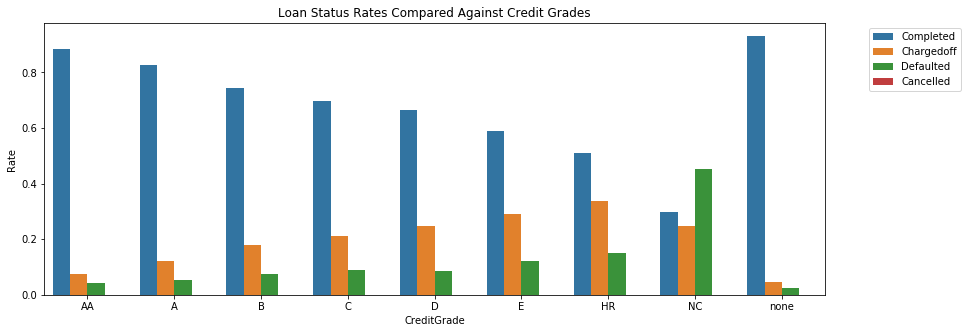

In [58]:
plt.subplots(figsize=(14,5))
sb.barplot(data=completion_rates, x = 'CreditGrade',y='Rate',hue='LoanStatus',order=credit_order)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Loan Status Rates Compared Against Credit Grades');

This shows much better the relationship between Credit Grade and completion rates for any given loan. There's an obvious trend (ignoring the 'none' category, which is where we've gathered anomalous data) between completion rate and Credit Grade. 

Let's take a brief look between rates for a Failure, defined by either a charge-off or a default, and completion. 

In [59]:
#copy existing dataframe
completion_rates_m = completion_rates.copy()
#generate a new dataframe, sort by Loan Status, and group by credit grade. Calculate combined failure rates and append new data
a = completion_rates_m[completion_rates_m['LoanStatus'].isin(['Chargedoff','Defaulted','Cancelled'])].groupby('CreditGrade')
b = a.sum()
b['LoanStatus'] = 'Failed'
b.reset_index(inplace=True)
completion_rates_m = completion_rates_m.append(b,ignore_index=True,sort=False)

In [60]:
#checking to see we got our data in the right place
completion_rates_m[completion_rates_m['LoanStatus']=='Failed']

,CreditGrade,LoanStatus,Rate
30,A,Failed,0.174644
31,AA,Failed,0.117436
32,B,Failed,0.255096
33,C,Failed,0.303030
34,D,Failed,0.335204
35,E,Failed,0.410432
36,HR,Failed,0.490764
37,NC,Failed,0.702128
38,none,Failed,0.068702


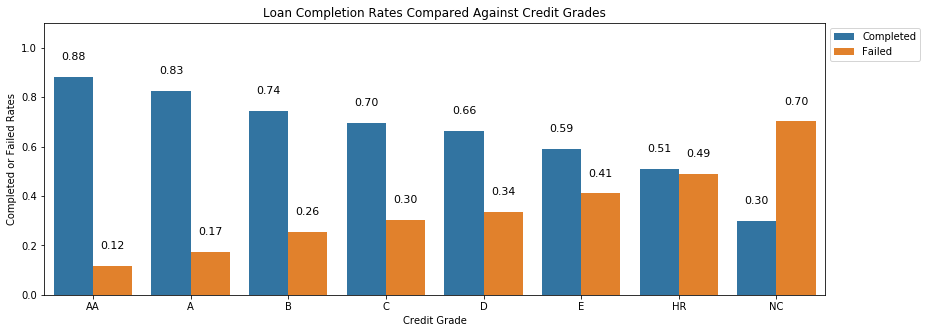

In [61]:
#mask out 'none' values - they skew the representation of the data in this case
mask = completion_rates_m['CreditGrade'] != 'none'
credit_order_m = credit_order.copy()
credit_order_m.remove('none')

plt.subplots(figsize=(14,5))
#generate a barplot for the information.
#getting ride of 'none' data as it skews the overall results
g = sb.barplot(data=completion_rates_m[mask], x = 'CreditGrade',y='Rate',hue='LoanStatus',order =credit_order_m,
               ci=None,hue_order=['Completed','Failed'])
plt.legend(bbox_to_anchor=(1.00,1),loc=2)
plt.title('Loan Completion Rates Compared Against Credit Grades')
plt.ylim(0,1.1) #get some more room for the annotations
plt.xlabel('Credit Grade')
plt.ylabel('Completed or Failed Rates')

#add labelling for data points for easier comparison
#https://stackoverflow.com/questions/45946970/displaying-of-values-on-barchart - thanks!
for p in g.patches: 
    g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')

Here, the successful completion rate of a loan is obviously tied to Credit Grade, with obvious gradations between likelihood of failure of a loan and the CreditGrade. It's an obviously good metric to determine if a loan will be successful. 

However, is this a self-reinforcing system? Do people with good credit ratings get better terms, meaning a loan is easier to take to completion? 

### Borrower APR and Credit Grade
I want to see if there's a relationship between Credit Grade and Borrowing Rates.

Text(0.5, 1.0, 'Mean Borrower APR Variation by Credit Grade')

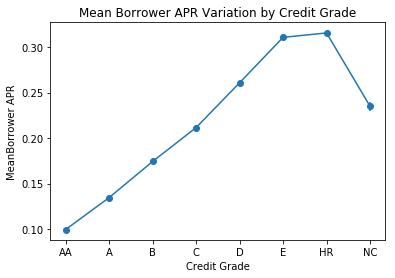

In [62]:
#generate an errorbar line-plot of borrower rates
#calculate means and standard error 
#mask out 'none' data. re-use revised credit_order_m from previous
mask = (loans_c['CreditGrade'] != 'none')
y_mean = loans_c[mask].groupby('CreditGrade')['BorrowerAPR'].mean()
y_sem = loans_c[mask].groupby('CreditGrade')['BorrowerAPR'].sem()

#re-order data to get it displaying correctly
y1 = []
y1_err = []
for i in credit_order_m:
    y1.append(y_mean[i])
    y1_err.append(y_sem[i])

#plot errorbars
plt.errorbar(y=y1,x=credit_order_m,yerr=y1_err,fmt='o-')
plt.xlabel('Credit Grade')
plt.ylabel('MeanBorrower APR');
plt.title('Mean Borrower APR Variation by Credit Grade')

As expected, there's an obvious relationship between `BorrowerAPR` and `CreditGrade`. Interestingly, a Borrower's APR drops significantly for a consumer with no credit. While we showed that consumers with an NC rating were very likely to fail to pay back their loans, the mean rate assigned to those consumers is lower than those with bad credit ratings.

Is there further differences to be gleaned if we look at completed and failed rates? 

In [63]:
#convert Chargedoff, Cancelled and Defaulted to Failed loans
loans_c_m=loans_c.replace(to_replace=['Cancelled','Chargedoff','Defaulted'],value='Failed')

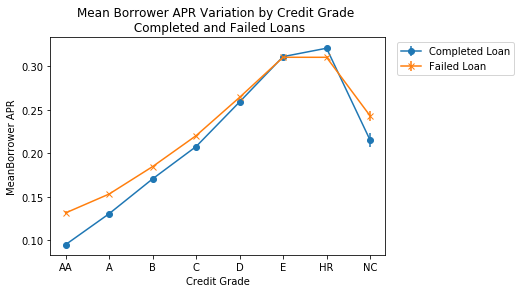

In [64]:
#calculate means and error for items of interest
mask = (loans_c['CreditGrade'] != 'none')

y_mean = loans_c_m[mask].groupby(['CreditGrade','LoanStatus'])['BorrowerAPR'].mean()
y_sem = loans_c_m[mask].groupby(['CreditGrade','LoanStatus'])['BorrowerAPR'].sem()

yc = []
yc_err = []
yf =[]
yf_err = []
#grab the appropraite data from our grouped dataframe
for i in credit_order_m:
    yc.append(y_mean[i]['Completed'])
    yc_err.append(y_sem[i]['Completed'])
    yf.append(y_mean[i]['Failed'])
    yf_err.append(y_sem[i]['Failed'])
 
#initialize a color map to keep consistent coloring
cmap = plt.get_cmap("tab10")

#make errorbar plots of gathered data
plt.errorbar(y=yc,x=credit_order_m,yerr=yc_err,color=cmap(0),marker='o',linestyle='-')
plt.errorbar(y=yf,x=credit_order_m,yerr=yf_err,color=cmap(1),marker='x',linestyle='-')
plt.xlabel('Credit Grade')
plt.ylabel('MeanBorrower APR');
plt.title('Mean Borrower APR Variation by Credit Grade \n Completed and Failed Loans')
plt.legend(['Completed Loan','Failed Loan'],bbox_to_anchor=(1.4,1),loc=1);


In an interesting turn of events, there's a noticeable difference in mean `BorrowerAPR` across the spectrum of `CreditGrade`s. This suggests that the earlier insight that there may be a link between `BorrowerAPR` and `LoanStatus` is valid. If a loan has a higher APR, regardless of `CreditGrade`, there's a higher likelihood that the borrower will fail to pay off that loan. 

This trend tends to break down at worse ratings, where rates equal out.


### Lender Yield - Profit Problems?
I wonder if there's a link here between loan failure rates and lender yields? Does `LenderYield` have an effect on failure rates? Is a profit motive leading to a higher likelihood of a loss, by boosting `BorrowerAPR`?

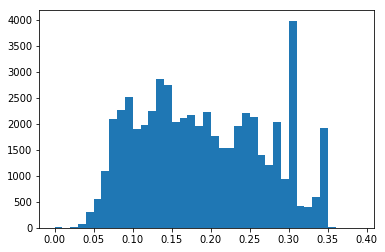

In [65]:
plt.hist(loans_c_m['LenderYield'],bins=np.arange(0,0.4,0.01));

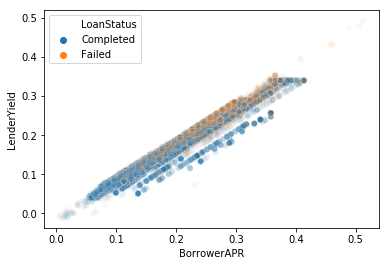

In [66]:
sb.scatterplot(data=loans_c_m,x='BorrowerAPR',y='LenderYield',hue='LoanStatus',x_jitter=0.1,alpha=0.05);

It looks like there's some clustering in this graph, with a higher `LenderYield`s appearing to correspond to more failed loans for a given `BorrowerAPR`. 

### Engineered Feature - `LenderYield`
We've already demonstrated an effect of higher `BorrowerAPR` on failure likelihood for a loan. However, it's difficult to say if there's a causal relationship here. Let's develop some more comparative measures between `LenderYield` and `BorrowerAPR` to see if there's anything else interesting going on. 

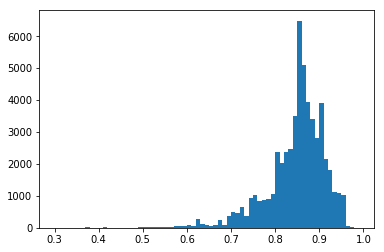

In [67]:
#generating new features for review
loans_c_m['LenderRateRatio']=loans_c_m['LenderYield'] / loans_c_m['BorrowerAPR']
loans_c_m['LenderRateDiff']= loans_c_m['BorrowerAPR'] - loans_c_m['LenderYield']

#plot ratios
plt.hist(loans_c_m['LenderRateRatio'],bins=np.arange(0.3,1,0.01));

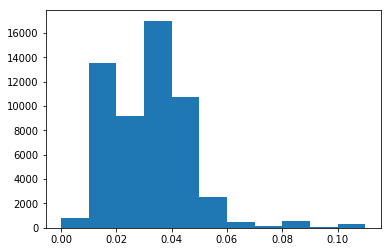

In [68]:
#plot rate differential
plt.hist(loans_c_m['LenderRateDiff'],bins=np.arange(0,0.12,0.01));

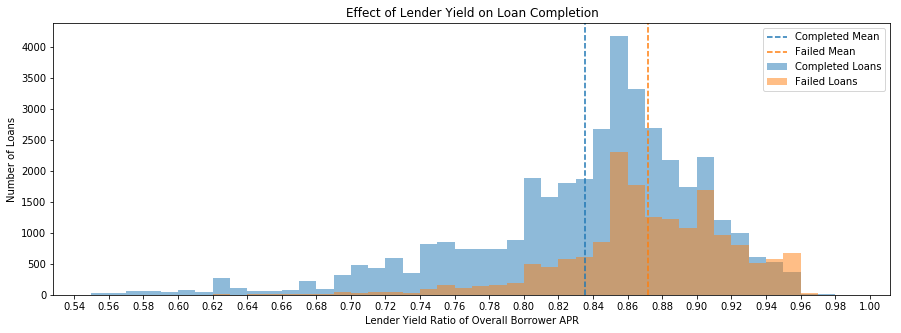

In [69]:
#setup dataframe mask and bin range
complete=loans_c_m['LoanStatus']=='Completed'
failed = loans_c_m['LoanStatus'] == 'Failed'
bins=np.arange(0.55,1,0.01)

#get colors, set figsize
cmap = plt.get_cmap("tab10")
plt.subplots(figsize=(15,5))

#plot completed loan distribution and the mean value
plt.hist(loans_c_m[complete]['LenderRateRatio'],bins=bins,alpha=0.5,label='Completed Loans',color=cmap(0))
plt.axvline(loans_c_m[complete]['LenderRateRatio'].mean(),linestyle='dashed',color=cmap(0),label = 'Completed Mean')

#plot failed loan distribution and the mean value
plt.hist(loans_c_m[failed]['LenderRateRatio'],bins=bins,alpha=0.5,label='Failed Loans',color=cmap(1));
plt.axvline(loans_c_m[failed]['LenderRateRatio'].mean(),linestyle='dashed',color=cmap(1),label='Failed Mean')

plt.legend();
plt.title('Effect of Lender Yield on Loan Completion');
plt.xlabel('Lender Yield Ratio of Overall Borrower APR');
plt.ylabel('Number of Loans');
plt.locator_params(nbins=25,axis='x');

We're demonstrating that failed loans tend to have a higher ratio between `LenderYield` and `BorrowerAPR`. That is to say that our failed loans are expected to have more profit for a lender. This would make sense in terms or risk - you'd want a higher return on your investment if you were planning on lending to a riskier individual. 

This isn't necessarily a causal relationship though. We need to determine some link between

In [70]:
loans_c_m[loans_c_m['CreditGrade']=='AA']['LenderRateRatio'].describe()

count    5291.000000
mean        0.840687
std         0.073603
min        -0.303030
25%         0.805749
50%         0.855537
75%         0.888515
max         0.993471
Name: LenderRateRatio, dtype: float64

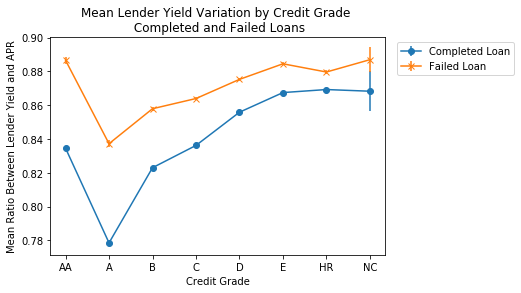

In [71]:
#calculate means and error for items of interest
mask = (loans_c_m['CreditGrade'] != 'none')

y_mean = loans_c_m[mask].groupby(['CreditGrade','LoanStatus'])['LenderRateRatio'].mean()
y_sem = loans_c_m[mask].groupby(['CreditGrade','LoanStatus'])['LenderRateRatio'].sem()

yc = []
yc_err = []
yf =[]
yf_err = []
#grab the appropraite data from our grouped dataframe
for i in credit_order_m:
    yc.append(y_mean[i]['Completed'])
    yc_err.append(y_sem[i]['Completed'])
    yf.append(y_mean[i]['Failed'])
    yf_err.append(y_sem[i]['Failed'])
 
#initialize a color map to keep consistent coloring
cmap = plt.get_cmap("tab10")

#make errorbar plots of gathered data
plt.errorbar(y=yc,x=credit_order_m,yerr=yc_err,color=cmap(0),marker='o',linestyle='-')
plt.errorbar(y=yf,x=credit_order_m,yerr=yf_err,color=cmap(1),marker='x',linestyle='-')
plt.xlabel('Credit Grade')
plt.ylabel('Mean Ratio Between Lender Yield and APR');
plt.title('Mean Lender Yield Variation by Credit Grade \n Completed and Failed Loans')
plt.legend(['Completed Loan','Failed Loan'],bbox_to_anchor=(1.4,1),loc=1);


There's between a 5% and 10% difference between failed and completed loans across `CreditGrade`s, again depicting the link between expected yield and a failure of a loan. This phenomenon is obvious across all grades, even those presumed less likely to fail based on their grade. 


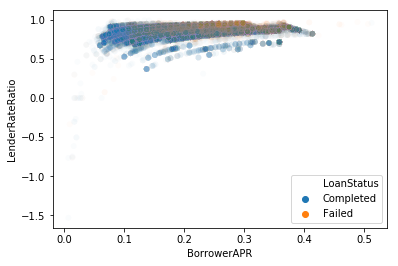

In [72]:
sb.scatterplot(data=loans_c_m,x='BorrowerAPR',y='LenderRateRatio',hue='LoanStatus',x_jitter=0.1,alpha=0.02);

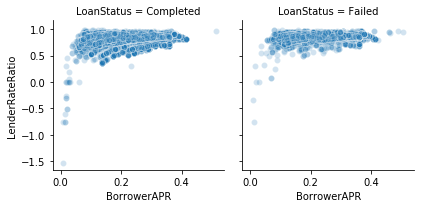

In [73]:
g = sb.FacetGrid(data = loans_c_m, col = 'LoanStatus')
g.map(sb.scatterplot,'BorrowerAPR','LenderRateRatio',alpha=0.2);

Is `DebtToIncomeRatio` having the same sort of effect on `BorrowerAPR` as `CreditGrade`? 

Text(0.5, 1.0, 'Borrower APR against Debt to Income Ratio')

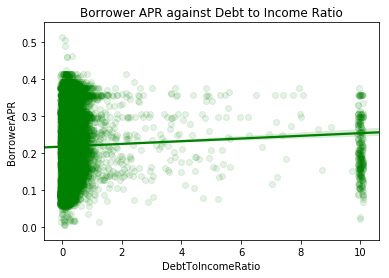

In [74]:
sb.regplot(x=loans_c_m['DebtToIncomeRatio'],y=loans_c_m['BorrowerAPR'],
           color='green',marker = 'o',
           x_jitter=0.1,scatter_kws={'alpha':0.1});


plt.title('Borrower APR against Debt to Income Ratio')


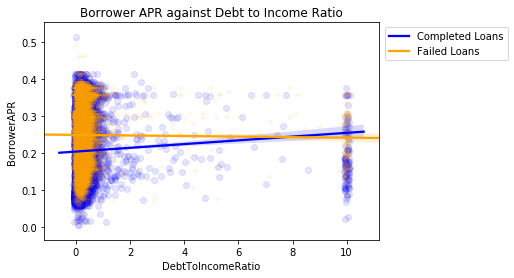

In [75]:
mask1 = loans_c_m['LoanStatus']=='Completed'
mask2 = loans_c_m['LoanStatus']=='Failed'
sb.regplot(x=loans_c_m[mask1]['DebtToIncomeRatio'],y=loans_c_m[mask1]['BorrowerAPR'],
           color='blue',marker = 'o',
           x_jitter=0.1,scatter_kws={'alpha':0.1});

sb.regplot(x=loans_c_m[mask2]['DebtToIncomeRatio'],y=loans_c_m[mask2]['BorrowerAPR'],
           color='orange',marker = '+',
           x_jitter=0.1,scatter_kws={'alpha':0.1});

plt.title('Borrower APR against Debt to Income Ratio')
plt.legend(['Completed Loans','Failed Loans'],bbox_to_anchor=(1.4,1),loc=1);

`DebtToIncomeRatio` appears to have very little effect on `BorrowerAPR`. There is a slight difference in means regressions between Completed and Failed loans, but this doesn't appear to be a good indicator of the type of APR you'll be getting with a certain Debt to Income Ratio. `CreditGrade` still appears to be our best indicator of success, as well as actual `BorrowerAPR`.

What else is likely to make a loan succeed or fail? 

How about a look at monthly income versus monthly loan payments? `StatedMonthlyIncome` vs `MonthlyLoanPayment`, here we go. This seems like it would be a similar result as our previous analysis of `DebtToIncomeRatio` and `BorrowerAPR`, but is more direct. `DebtToIncomeRatio` also appears not to be updated or re-calculated based on the burden of whatever loan is being taken on.

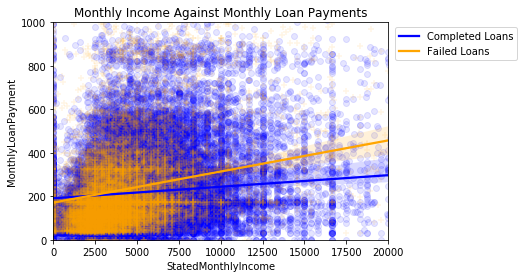

In [76]:
mask1 = loans_c_m['LoanStatus']=='Completed'
mask2 = loans_c_m['LoanStatus']=='Failed'
sb.regplot(x=loans_c_m[mask1]['StatedMonthlyIncome'],y=loans_c_m[mask1]['MonthlyLoanPayment'],
           color='blue',marker = 'o',
           x_jitter=0.1,scatter_kws={'alpha':0.1});

sb.regplot(x=loans_c_m[mask2]['StatedMonthlyIncome'],y=loans_c_m[mask2]['MonthlyLoanPayment'],
           color='orange',marker = '+',
           x_jitter=0.1,scatter_kws={'alpha':0.1});

plt.xlim(0,20000)
plt.ylim(0,1000)

plt.title('Monthly Income Against Monthly Loan Payments')
plt.legend(['Completed Loans','Failed Loans'],bbox_to_anchor=(1.4,1),loc=1);

Well. That's an unreadable mess. The trend lines do suggest some sort of relationship, but the data is all over the place. Any correlation is going to be fairly low. 

How about we add an additional feature to the dataset and compare the ratio between `MonthlyLoanPayment` and `StatedMonthlyIncome`? This should give a better idea of the overall burden an individual has on their income with their loan payments, and may show more obvious trends.

In [77]:
#generate new loan measures between monthly income and loan payments

loans_c_m['LoanRatio'] = loans_c_m['MonthlyLoanPayment'] / loans_c_m['StatedMonthlyIncome']
#drop infinite values, where no income is stated
loans_c_m['LoanRatio'].replace([np.inf,-np.inf],np.nan,inplace=True)
loans_c_m['LoanDiff'] = loans_c_m['StatedMonthlyIncome'] - loans_c_m['MonthlyLoanPayment'] 

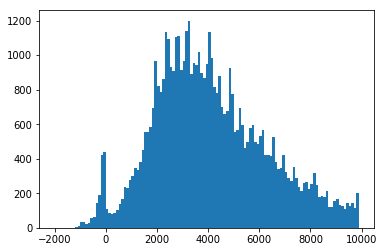

In [78]:
plt.hist(loans_c_m['LoanDiff'],bins=range(-2000,10000,100));

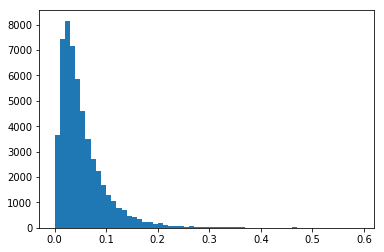

In [79]:
plt.hist(loans_c_m['LoanRatio'],bins=np.arange(0,0.6,0.01));

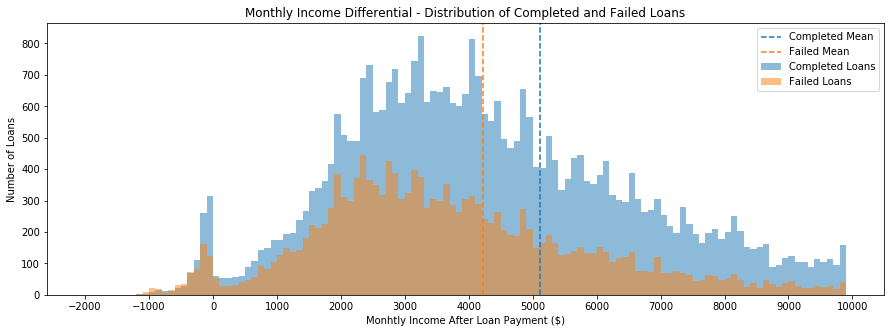

In [80]:
complete=loans_c_m['LoanStatus']=='Completed'
failed = loans_c_m['LoanStatus'] == 'Failed'
bins = range(-2000,10000,100)

cmap = plt.get_cmap("tab10")
plt.subplots(figsize=(15,5))
#plot completed loan distribution and the mean value
plt.hist(loans_c_m[complete]['LoanDiff'],bins=bins,alpha=0.5,label='Completed Loans',color=cmap(0))
plt.axvline(loans_c_m[complete]['LoanDiff'].mean(),linestyle='dashed',color=cmap(0),label = 'Completed Mean')

#plot failed loan distribution and the mean value
plt.hist(loans_c_m[failed]['LoanDiff'],bins=bins,alpha=0.5,label='Failed Loans',color=cmap(1));
plt.axvline(loans_c_m[failed]['LoanDiff'].mean(),linestyle='dashed',color=cmap(1),label='Failed Mean')

plt.legend();
plt.xlabel('Monhtly Income After Loan Payment ($)');
plt.ylabel('Number of Loans');
plt.title('Monthly Income Differential - Distribution of Completed and Failed Loans');
plt.locator_params(nbins=25,axis='x');

This appears to be another good indicator of whether a loan is likely to fail or not, and makes sense - having more money per month after servicing your debt makes it more likely you'll be able to continue servicing that debt if something goes wrong. It's  certainly not a magic bullet, but there appears to be a change in failure vs. completion rates after you have $2000/mo remaining after debt servicing.

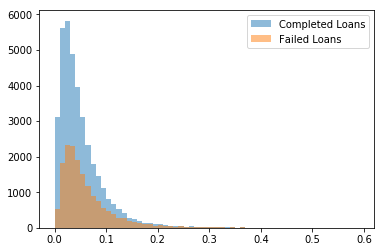

In [81]:
complete=loans_c_m['LoanStatus']=='Completed'
failed = loans_c_m['LoanStatus'] == 'Failed'
bins = np.arange(0,0.6,0.01)

plt.hist(loans_c_m[complete]['LoanRatio'],bins=bins,alpha=0.5,label='Completed Loans')
plt.hist(loans_c_m[failed]['LoanRatio'],bins=bins,alpha=0.5,label='Failed Loans');
plt.legend();

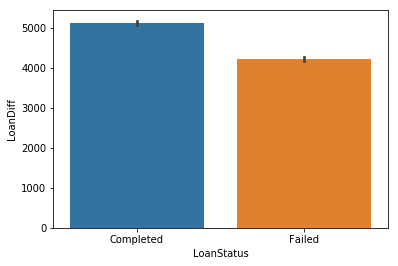

In [82]:
sb.barplot(data=loans_c_m,x='LoanStatus',y='LoanDiff');

Of the additional features we've added, the `LoanDiff` feature is the most indicative of the trend we're seeing elsewhere. Comparison of the mean values of both completed and failed loans shows that a larger income after a loan has been serviced means a loan is more likely to be paid off. 

There appears to be a marked shift in successful loans after an individual has about $2000 left over each month, after servicing their loan. This suggests a link between loan success and overall income.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

`LenderYield` and the calculated `LenderRateRatio` indicator show a correlation between higher expected yields on a loan and its rate of failure. Even when controlling for `CreditGrade`, failed loans have much higher `LenderYield`s and `BorrowerAPR`s than those that have completed. This is interesting, and suggests that there's a profit or return on investment motive that leads to practices where a loan is more likely to fail. 

### Were there any interesting or surprising interactions between features?

The apparent profit motive in loan failure is fascinating, particularly for this dataset. Prosper loans appear to be personally backed. It certainly makes sense that a person would want to make as much money as they can off of a loan, but it also appears that this drive makes it difficult to actually get the loan back. 

Perhaps there's some sort of 'risk' number at play here. A person will push higher terms due to perceived risks, which make the loan harder to pay back and more likely to fail as a result. There's certainly a greed narrative that is worth further exploration. This would be less surprising if this effect weren't evident across all credit grades, but it's on display across the whole spectrum.